,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


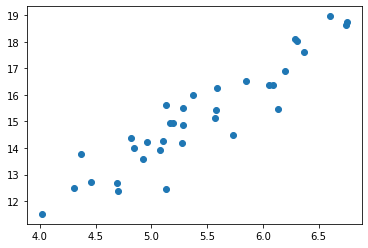

In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# from https://www.kaggle.com/aungpyaeap/fish-market
fish_market_path = "SOME/PATH/TO/fish.csv"
fish_csv = pd.read_csv(fish_market_path)

# Get matrix of (width, height) for all "Bream"
# Samples
fish_stats = fish_csv[fish_csv["Species"] == "Bream"]
fish_stats = fish_stats[["Width", "Height"]].to_numpy()

# Scatter plot (width vs height) and display
# the fish market dataframe
plt.scatter(fish_stats[:,0], fish_stats[:, 1])
fish_csv

## Constructing The Input Matrices

we now construct $\mathbf{X}$ and $\mathbf{\underset{\sim}{y}}$ with the values from
the fishmarket dataset.

In [2]:
def get_full_sample_matrix(samples):
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)
        
    ones_vec = np.ones((samples_matrix.shape[0], 1), dtype=samples.dtype)
    return np.hstack([ones_vec, samples_matrix])


Xs = get_full_sample_matrix(fish_stats[:, 0])
print(f"Description of Xs:\n{pd.DataFrame(Xs).describe()}\n\n")
Ys = fish_stats[:, 1].reshape((Xs.shape[0], 1))
print(f"Description of Ys:\n{pd.DataFrame(Ys).describe()}\n\n")


Description of Xs:
          0          1
count  35.0  35.000000
mean    1.0   5.427614
std     0.0   0.721509
min     1.0   4.020000
25%     1.0   4.943400
50%     1.0   5.280100
75%     1.0   6.071600
max     1.0   6.749700


Description of Ys:
               0
count  35.000000
mean   15.183211
std     1.964707
min    11.520000
25%    13.958900
50%    14.954400
75%    16.360900
max    18.957000




## Implementation Of The Gradient Descent

The following cell will implement the gradient descent algorithm as
per described in my post on how to implement linear regression with 
gradient descent in Python.

In addition, it will use the `grad_desc` function to find the best
line, and plot that prediction line with the original samples in the
dataset.

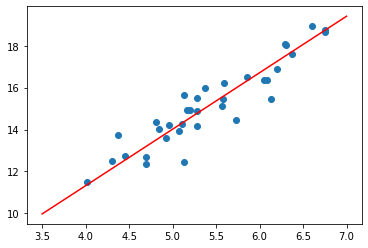

In [3]:
def grad_desc(Xs, Ys, rate = 0.001, iterations = 100):
    Ws = np.zeros((Xs.shape[1], 1))
    for _ in range(iterations):
        errors = Ys - Xs.dot(Ws)
        grad = -(Xs.T).dot(errors)
        Ws = Ws - (grad)*rate
    return Ws

# The vector w representing all
# wieghts in the line
w = grad_desc(Xs, Ys)

# Predicting two ends of our line,
# then drawing the line with the
# original samples.
line_ends = np.array([3.5, 7.0])
prediction_Xs = get_full_sample_matrix(line_ends)
prediction_Ys = (prediction_Xs).dot(w)

plt.plot(line_ends, prediction_Ys, color="red")
plt.scatter(fish_stats[:,0], fish_stats[:, 1])